**Employee Attrition prediction**

Problem Statement
A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
A sizeable department has to be maintained, for the purposes of recruiting new talent
More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company
Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to curb attrition. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study
You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

In [1]:
# Importing Libraries.

import numpy as np
import pandas as pd
from numpy import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import (
    zero_one_loss, 
    accuracy_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)
from sklearn.metrics import precision_score,recall_score,f1_score

In [2]:
data=pd.read_csv(r"/content/DA Project data.csv")
data.head(1)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,51,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,...,Y,11,8,0,1.0,6,1,0,0,No


In [3]:
data.shape

(4410, 24)

In [4]:
data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

# Step1) Data Cleaning

### 1. Missing Value treatment

In [5]:
data.isnull().sum()

Age                         0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

In [6]:
data.NumCompaniesWorked.value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

In [7]:
data.NumCompaniesWorked=data.NumCompaniesWorked.fillna(data.NumCompaniesWorked.median())

In [8]:
data.TotalWorkingYears.value_counts()

10.0    605
6.0     375
8.0     307
9.0     287
5.0     264
7.0     243
1.0     242
4.0     189
12.0    144
3.0     126
15.0    120
16.0    111
13.0    108
11.0    106
21.0    102
17.0     99
14.0     93
2.0      93
20.0     89
18.0     81
23.0     66
19.0     66
22.0     62
24.0     54
25.0     42
26.0     42
28.0     42
0.0      33
29.0     30
31.0     27
32.0     27
27.0     21
30.0     21
33.0     21
36.0     18
34.0     15
37.0     12
35.0      9
40.0      6
38.0      3
Name: TotalWorkingYears, dtype: int64

In [9]:
data.TotalWorkingYears=data.TotalWorkingYears.fillna(data.TotalWorkingYears.median())

In [10]:
data.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64

### 2. Dropping Unique ID columns


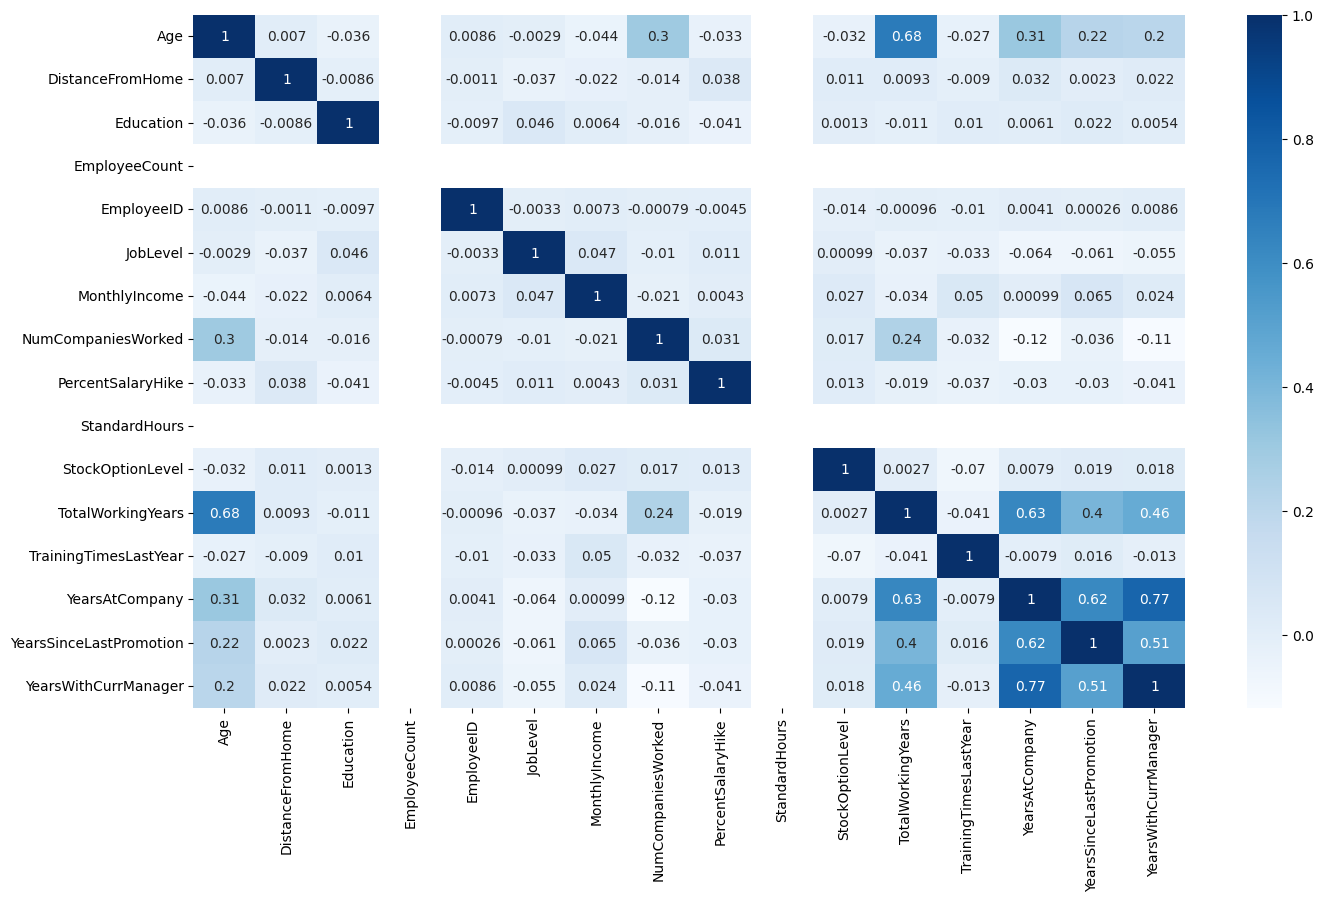

In [11]:
x=data.corr()
plt.figure(figsize=(16,9))
sns.heatmap(x,annot=True,cmap="Blues")
plt.show()

In [12]:
data=data.drop(["EmployeeID"],axis=1)

All Values are unique,thus we drop the column

In [13]:
data=data.drop(["Over18"],axis=1)

All Values are same,thus we drop the column

In [14]:
data=data.drop(["EmployeeCount"],axis=1)

All Values are same,thus we drop the column

In [15]:
data=data.drop(["StandardHours"],axis=1)

All Values are same,thus we drop the column

# Step 2) Data Transformation

### Data Type Conversion

In [16]:
data.dtypes

Age                          int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                   object
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
data.Attrition.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [19]:
data.Attrition=le.fit_transform(data.Attrition)

In [20]:
data.Attrition.value_counts()

0    3699
1     711
Name: Attrition, dtype: int64

In [21]:
data.BusinessTravel.value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

In [22]:
data.BusinessTravel=le.fit_transform(data.BusinessTravel)

In [23]:
data.BusinessTravel.value_counts()

2    3129
1     831
0     450
Name: BusinessTravel, dtype: int64

In [24]:
data.Department.value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

In [25]:
data.Department=le.fit_transform(data.Department)

In [26]:
data.Department.value_counts()

1    2883
2    1338
0     189
Name: Department, dtype: int64

In [27]:
data.EducationField.value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

In [28]:
data.EducationField=le.fit_transform(data.EducationField)

In [29]:
data.EducationField.value_counts()

1    1818
3    1392
2     477
5     396
4     246
0      81
Name: EducationField, dtype: int64

In [30]:
data.Gender.value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

In [31]:
data.Gender=le.fit_transform(data.Gender)

In [32]:
data.Gender.value_counts()

1    2646
0    1764
Name: Gender, dtype: int64

In [33]:
data.JobRole.value_counts()

Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: JobRole, dtype: int64

In [34]:
data.JobRole=le.fit_transform(data.JobRole)

In [35]:
data.JobRole.value_counts()

7    978
6    876
2    777
4    435
0    393
3    306
8    249
5    240
1    156
Name: JobRole, dtype: int64

In [36]:
data.MaritalStatus.value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

In [37]:
data.MaritalStatus=le.fit_transform(data.MaritalStatus)

In [38]:
data.MaritalStatus.value_counts()

1    2019
2    1410
0     981
Name: MaritalStatus, dtype: int64

In [39]:
data.dtypes

Age                          int64
BusinessTravel               int64
Department                   int64
DistanceFromHome             int64
Education                    int64
EducationField               int64
Gender                       int64
JobLevel                     int64
JobRole                      int64
MaritalStatus                int64
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
Attrition                    int64
dtype: object

### Outlier Treatment 

In [40]:
# Here we have not treated outlier because some important information might get deleted.

### Skewness Treatment

In [41]:
data.skew()

Age                        0.413005
BusinessTravel            -1.438026
Department                 0.172114
DistanceFromHome           0.957466
Education                 -0.289484
EducationField             0.549997
Gender                    -0.408387
JobLevel                   1.024703
JobRole                   -0.357027
MaritalStatus             -0.152071
MonthlyIncome              1.368884
NumCompaniesWorked         1.031980
PercentSalaryHike          0.820569
StockOptionLevel           0.968321
TotalWorkingYears          1.118879
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
Attrition                  1.843111
dtype: float64

In [42]:
data.MonthlyIncome=np.log(data.MonthlyIncome)

In [43]:
data.NumCompaniesWorked=np.sqrt(data.NumCompaniesWorked)

In [44]:
data.TotalWorkingYears=np.sqrt(data.TotalWorkingYears)

In [45]:
data.YearsAtCompany=np.sqrt(data.YearsAtCompany)

In [46]:
data.YearsSinceLastPromotion=np.sqrt(data.YearsSinceLastPromotion)

# Step 3) Base Model

In [47]:
x=data.iloc[:,0:19]
y=data.iloc[:,-1]

In [48]:
import sklearn
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3528, 19), (882, 19), (3528,), (882,))

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier

In [52]:
# table of all models

models = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),  KNeighborsClassifier(), SVC()]

model_names = ['Naive Bayes','Logistic regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'KNN', 'SVC']

accuracy = []
Precision=[]
Recall=[]
f1_score=[]

for i in models:
    i.fit(x_train,y_train)
    i_p = i.predict(x_test)
    accuracy.append(accuracy_score(y_test, i_p))
    Precision.append(precision_score(i_p,y_test,average="weighted"))
    Recall.append(recall_score(i_p,y_test,average="weighted"))
    

model_comparison = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy , "Precision":Precision , "Recall":Recall })
model_comparison.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall
3,Random Forest,0.993197,0.993197,0.993197
2,Decision Tree,0.989796,0.989919,0.989796
6,SVC,0.848073,1.000000,0.848073
1,Logistic regression,0.842404,0.963886,0.842404
4,Ada Boost,0.835601,0.925575,0.835601
5,KNN,0.799320,0.817804,0.799320
0,Naive Bayes,0.778912,0.791865,0.778912


### Individual Models

### 1.Logistic Regression

In [53]:
y=data.Attrition

In [54]:
x=data.iloc[:,0:-1]


In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [57]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [58]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3528, 19), (882, 19), (3528,), (882,))

In [59]:
lg.fit(x_train,y_train)

LogisticRegression()

In [60]:
lg_p=lg.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [62]:
lg_cf=confusion_matrix(lg_p,y_test)
lg_cf

array([[736, 127],
       [ 12,   7]])

In [63]:
lg_acc=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc

84.24036281179139

In [64]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       863
           1       0.05      0.37      0.09        19

    accuracy                           0.84       882
   macro avg       0.52      0.61      0.50       882
weighted avg       0.96      0.84      0.90       882



### 2.Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [66]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
dt_p=dt.predict(x_test)

In [68]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[742,   0],
       [  6, 134]])

In [69]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

99.31972789115646

In [70]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       742
           1       1.00      0.96      0.98       140

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882



### 3.Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [72]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
rf_p=rf.predict(x_test)

In [74]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[745,   3],
       [  3, 131]])

In [75]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

99.31972789115646

In [76]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



### 4.KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [79]:
knn_p=knn.predict(x_test)

In [80]:
knn_cf=confusion_matrix(knn_p,y_test)
knn_cf

array([[715,  97],
       [ 33,  37]])

In [81]:
knn_acc=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_acc

85.26077097505669

In [82]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       812
           1       0.28      0.53      0.36        70

    accuracy                           0.85       882
   macro avg       0.62      0.70      0.64       882
weighted avg       0.90      0.85      0.87       882



### 5.Ada Boost

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [85]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [86]:
adbo_p=adbo.predict(x_test)

In [87]:
adbo_cf=confusion_matrix(adbo_p,y_test)
adbo_cf

array([[745,   0],
       [  3, 134]])

In [88]:
adbo_acc=adbo_cf.diagonal().sum()/adbo_cf.sum()*100
adbo_acc

99.65986394557824

In [89]:
print(classification_report(adbo_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       745
           1       1.00      0.98      0.99       137

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



### 6.Naive Bayes

In [90]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [91]:
nb.fit(x_train,y_train)

MultinomialNB()

In [92]:
nb_p=nb.predict(x_test)

In [93]:
nb_cf=confusion_matrix(nb_p,y_test)

In [94]:
nb_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_acc

77.89115646258503

In [95]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       765
           1       0.21      0.24      0.22       117

    accuracy                           0.78       882
   macro avg       0.54      0.55      0.55       882
weighted avg       0.79      0.78      0.79       882



### 7.SVM

In [96]:
from sklearn.svm import SVC
svc=SVC()

In [97]:
svc.fit(x_train,y_train)

SVC()

In [98]:
svc_p=svc.predict(x_test)

In [99]:
svc_cf=confusion_matrix(svc_p,y_test)

In [100]:
svc_acc=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_acc

84.80725623582767

In [101]:
print(classification_report(svc_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       882
           1       0.00      0.00      0.00         0

    accuracy                           0.85       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.85      0.92       882



In [102]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [103]:
roc=roc_auc_score(rf_p,y_test)
roc

0.9868006225556708

In [104]:
rf_prob=rf.predict_proba(x_test)

In [105]:
df=pd.DataFrame(rf_prob)

In [106]:
fpr,tpr,threshhold=roc_curve(y_test,df.iloc[:,1])

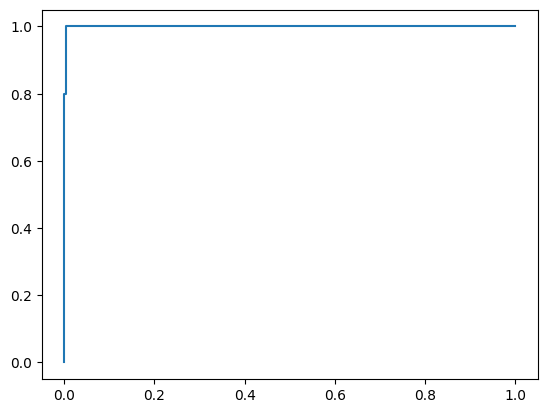

In [107]:
plt.plot(fpr,tpr)

# Step 4) Data Preprocessing

### 1.Random Undersampling

In [108]:
c_1,c_0=data["Attrition"].value_counts()
c_1,c_0

(3699, 711)

In [109]:
data_0=data.loc[data["Attrition"]==0]
data_1=data.loc[data["Attrition"]==1]

In [110]:
data_0.shape,data_1.shape

((3699, 20), (711, 20))

In [111]:
class_0under=data_0.sample(711)

In [112]:
class1_0=pd.concat([class_0under,data_1],axis=0)

In [113]:
class1_0.head()
class1_0.shape

(1422, 20)

In [114]:
class1_0.Attrition.value_counts()

0    711
1    711
Name: Attrition, dtype: int64

In [115]:
class1_0

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1787,54,2,1,18,4,3,0,2,2,0,10.812351,3.000000,15,1,3.000000,2,2.236068,1.0,4,0
981,31,1,2,3,3,2,1,2,7,2,10.740952,1.414214,18,1,3.000000,3,2.236068,1.0,4,0
1888,35,2,1,2,1,1,1,3,0,1,11.572043,1.000000,22,0,3.162278,3,3.162278,0.0,7,0
1122,35,2,1,25,1,3,1,1,7,1,10.898589,0.000000,18,0,2.449490,4,2.236068,0.0,4,0
1010,53,0,1,10,4,3,1,2,0,1,9.937889,2.000000,13,2,5.196152,2,1.732051,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381,29,2,1,7,1,1,0,1,6,2,9.989665,1.000000,21,0,2.000000,2,2.000000,0.0,1,1
4386,33,2,2,11,4,2,1,1,6,1,11.176053,2.236068,21,0,2.828427,2,2.236068,0.0,4,1
4388,33,2,2,1,3,1,1,2,3,1,10.848754,2.645751,11,0,3.605551,2,3.000000,1.0,7,1
4391,32,2,2,23,1,1,1,3,0,2,10.113748,0.000000,11,0,2.000000,2,1.732051,1.0,2,1


### 2. Feature Selection

In [116]:
u_x=class1_0.iloc[:,0:-1]
u_y=class1_0.iloc[:,-1]

In [117]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=90)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((1137, 19), (285, 19), (1137,), (285,))

In [118]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [119]:
rfe=RFE(dTree)

rfe.fit(u_x,u_y)
rfe.support_
df=pd.DataFrame({"score":list(rfe.support_),"columns":list(x)})
df1=df.sort_values(["score"],ascending=False)
df1

,score,columns
0,True,Age
11,True,NumCompaniesWorked
3,True,DistanceFromHome
4,True,Education
16,True,YearsAtCompany
15,True,TrainingTimesLastYear
14,True,TotalWorkingYears
12,True,PercentSalaryHike
10,True,MonthlyIncome
17,False,YearsSinceLastPromotion


In [120]:
data=data.drop(["JobLevel"],axis=1)
data=data.drop(["BusinessTravel"],axis=1)
data=data.drop(["Gender"],axis=1)
data=data.drop(["NumCompaniesWorked"],axis=1)
data=data.drop(["EducationField"],axis=1)
data=data.drop(["StockOptionLevel"],axis=1)
data=data.drop(["Education"],axis=1)
data=data.drop(["Department"],axis=1)
data=data.drop(["YearsSinceLastPromotion"],axis=1)
data=data.drop(["MaritalStatus"],axis=1)

### 3.Skewness Treatment

In [121]:
data.skew()

Age                      0.413005
DistanceFromHome         0.957466
JobRole                 -0.357027
MonthlyIncome            0.285997
PercentSalaryHike        0.820569
TotalWorkingYears        0.177327
TrainingTimesLastYear    0.552748
YearsAtCompany           0.426544
YearsWithCurrManager     0.832884
Attrition                1.843111
dtype: float64

In [122]:
#sns.boxplot(y=data)

In [123]:
data.MonthlyIncome=np.log(data.MonthlyIncome)

In [124]:
data.TotalWorkingYears=np.sqrt(data.TotalWorkingYears)

In [125]:
data.YearsAtCompany=np.sqrt(data.YearsAtCompany)

In [126]:
data.skew()

Age                      0.413005
DistanceFromHome         0.957466
JobRole                 -0.357027
MonthlyIncome            0.172652
PercentSalaryHike        0.820569
TotalWorkingYears       -0.943003
TrainingTimesLastYear    0.552748
YearsAtCompany          -1.095131
YearsWithCurrManager     0.832884
Attrition                1.843111
dtype: float64

# Step 5) Model Building

### 1.Logistic Regression

In [127]:
y=data.Attrition

In [128]:
x=data.iloc[:,0:-1]


In [129]:
from sklearn.model_selection import train_test_split

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [131]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [132]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3528, 9), (882, 9), (3528,), (882,))

In [133]:
lg.fit(x_train,y_train)

LogisticRegression()

In [134]:
lg_p=lg.predict(x_test)

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
lg_cf=confusion_matrix(lg_p,y_test)
lg_cf

array([[743, 132],
       [  5,   2]])

In [137]:
lg_acc=lg_cf.diagonal().sum()/lg_cf.sum()*100
lg_acc

84.4671201814059

In [138]:
print(classification_report(lg_p,y_test))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       875
           1       0.01      0.29      0.03         7

    accuracy                           0.84       882
   macro avg       0.50      0.57      0.47       882
weighted avg       0.99      0.84      0.91       882



### 2.Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [140]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [141]:
dt_p=dt.predict(x_test)

In [142]:
dt_cf=confusion_matrix(dt_p,y_test)
dt_cf

array([[745,   3],
       [  3, 131]])

In [143]:
dt_acc=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc

99.31972789115646

In [144]:
print(classification_report(dt_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



### 3.Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [146]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [147]:
rf_p=rf.predict(x_test)

In [148]:
rf_cf=confusion_matrix(rf_p,y_test)
rf_cf

array([[745,   3],
       [  3, 131]])

In [149]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

99.31972789115646

In [150]:
print(classification_report(rf_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



### 4.KNN

In [151]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [152]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [153]:
knn_p=knn.predict(x_test)

In [154]:
knn_cf=confusion_matrix(knn_p,y_test)
knn_cf

array([[723,  94],
       [ 25,  40]])

In [155]:
knn_acc=knn_cf.diagonal().sum()/knn_cf.sum()*100
knn_acc

86.5079365079365

In [156]:
print(classification_report(knn_p,y_test))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       817
           1       0.30      0.62      0.40        65

    accuracy                           0.87       882
   macro avg       0.63      0.75      0.66       882
weighted avg       0.92      0.87      0.89       882



### 5.Ada Boost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [159]:
adbo.fit(x_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [160]:
adbo_p=adbo.predict(x_test)

In [161]:
adbo_cf=confusion_matrix(adbo_p,y_test)
adbo_cf

array([[745,   3],
       [  3, 131]])

In [162]:
adbo_acc=adbo_cf.diagonal().sum()/adbo_cf.sum()*100
adbo_acc

99.31972789115646

In [163]:
print(classification_report(adbo_p,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       748
           1       0.98      0.98      0.98       134

    accuracy                           0.99       882
   macro avg       0.99      0.99      0.99       882
weighted avg       0.99      0.99      0.99       882



### 6.Naive Bayes

In [164]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [165]:
nb.fit(x_train,y_train)

MultinomialNB()

In [166]:
nb_p=nb.predict(x_test)

In [167]:
nb_cf=confusion_matrix(nb_p,y_test)

In [168]:
nb_acc=nb_cf.diagonal().sum()/nb_cf.sum()*100
nb_acc

80.8390022675737

In [169]:
print(classification_report(nb_p,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       809
           1       0.14      0.26      0.18        73

    accuracy                           0.81       882
   macro avg       0.53      0.56      0.54       882
weighted avg       0.86      0.81      0.83       882



### 7.SVM

In [170]:
from sklearn.svm import SVC
svc=SVC()

In [171]:
svc.fit(x_train,y_train)

SVC()

In [172]:
svc_p=svc.predict(x_test)

In [173]:
svc_cf=confusion_matrix(svc_p,y_test)

In [174]:
svc_acc=svc_cf.diagonal().sum()/svc_cf.sum()*100
svc_acc

84.80725623582767

In [175]:
print(classification_report(svc_p,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       882
           1       0.00      0.00      0.00         0

    accuracy                           0.85       882
   macro avg       0.50      0.42      0.46       882
weighted avg       1.00      0.85      0.92       882



### 8.XGBoost

In [176]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [177]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [178]:
xgb_p=nb.predict(x_test)

In [179]:
xgb_cf=confusion_matrix(xgb_p,y_test)

In [180]:
xgb_acc=xgb_cf.diagonal().sum()/xgb_cf.sum()*100
xgb_acc

80.8390022675737

In [181]:
print(classification_report(xgb_p,y_test))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       809
           1       0.14      0.26      0.18        73

    accuracy                           0.81       882
   macro avg       0.53      0.56      0.54       882
weighted avg       0.86      0.81      0.83       882



In [182]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [183]:
roc=roc_auc_score(rf_p,y_test)
roc

0.9868006225556708

In [184]:
rf_prob=rf.predict_proba(x_test)

In [185]:
df=pd.DataFrame(rf_prob)

In [186]:
fpr,tpr,threshhold=roc_curve(y_test,df.iloc[:,1])

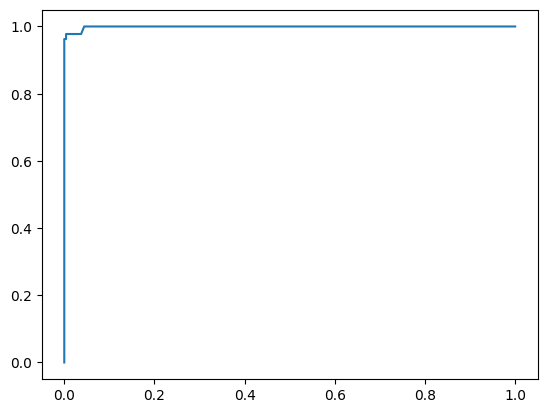

In [187]:
plt.plot(fpr,tpr)